# Downloading and Prepping Data 

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [5]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                        sheet_name = 'Canada by Citizenship',
                        skiprows = range(20),
                        skipfooter = 2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [6]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
print(df_can.shape)

(195, 43)


In [8]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace = True)

df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'Regname':'Region'}, inplace = True)

df_can.columns = list(map(str, df_can.columns))

df_can.set_index('Country', inplace = True)

df_can['Total'] = df_can.sum (axis = 1)

years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


C:\Users\User\AppData\Local\Temp\ipykernel_14712\1817412275.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum (axis = 1)


## Visualizing Data using Matplotlib

In [9]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.5.1


## Word Clouds 

In [10]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

print('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [16]:
alice_novel = open('alice_novel.txt', 'r').read()

print('File downloaded and saved!')

File downloaded and saved!


In [17]:
stopwords = set(STOPWORDS)

In [18]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

alice_wc.generate(alice_novel)

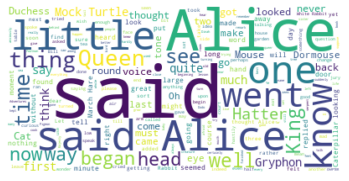

In [19]:
plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

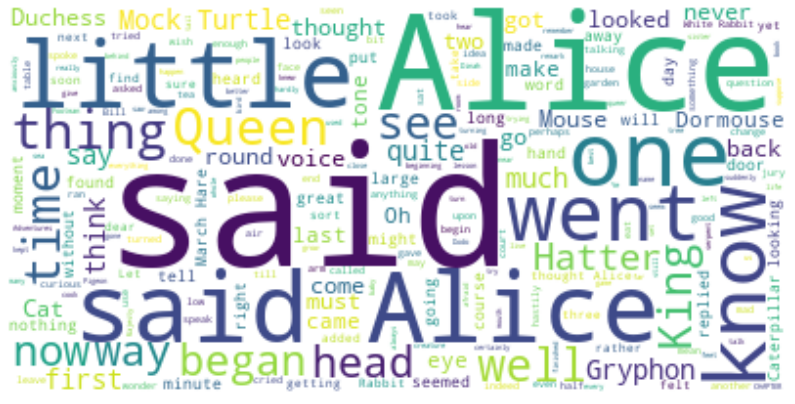

In [20]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

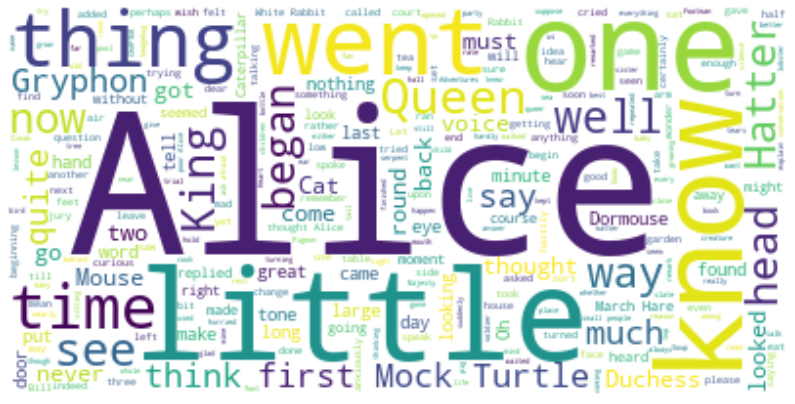

In [21]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


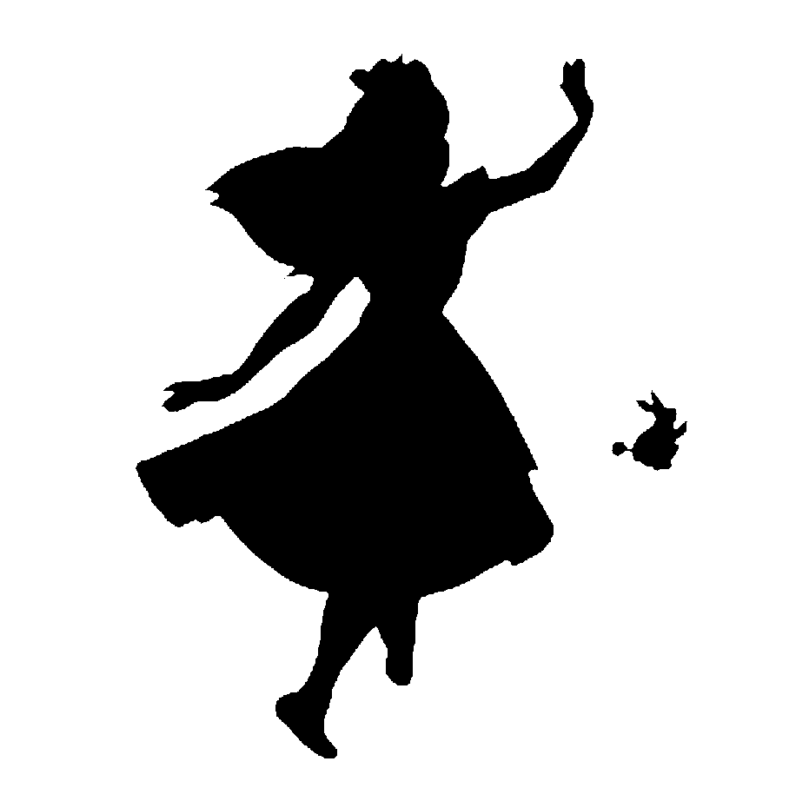

In [24]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

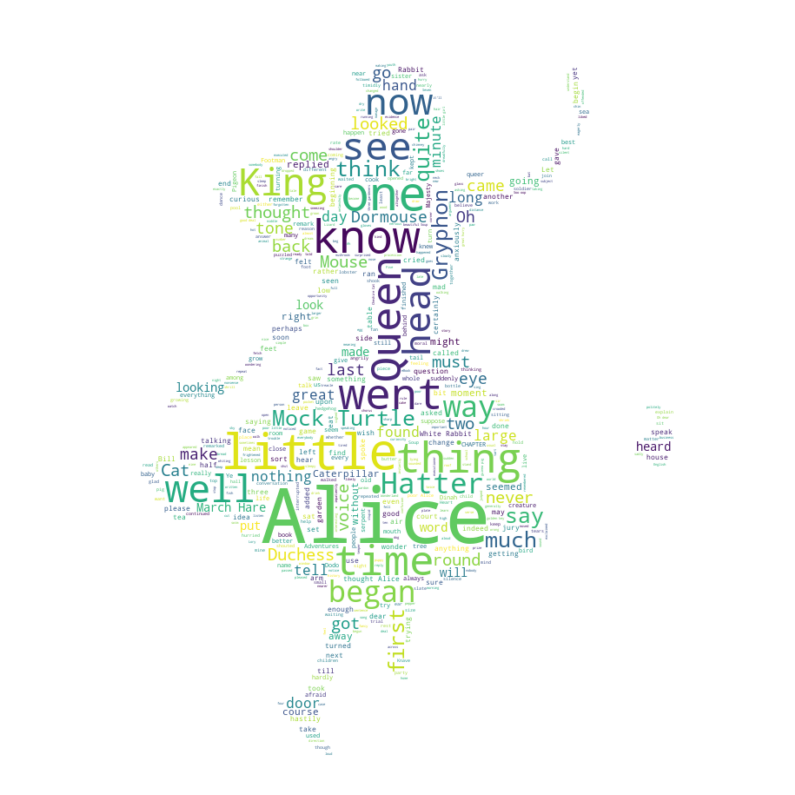

In [25]:
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
df_can.head()

,Continent,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [27]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [28]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
        
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [29]:
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


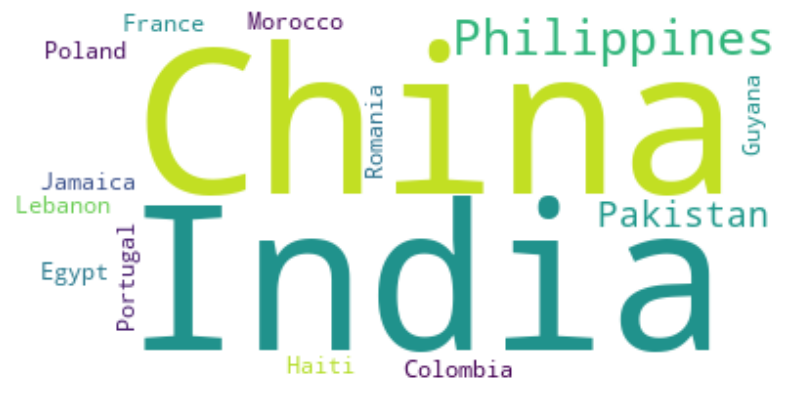

In [30]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression Plots 

In [31]:
!pip install seaborn

import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


In [32]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(float, df_tot.index)

df_tot.reset_index(inplace = True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


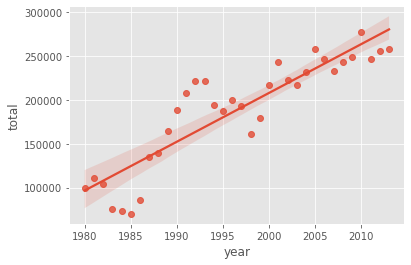

In [33]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

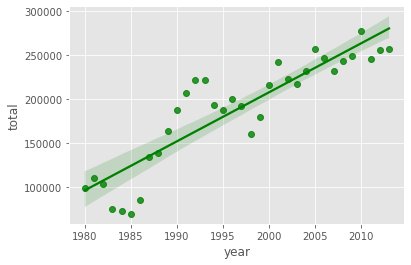

In [34]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

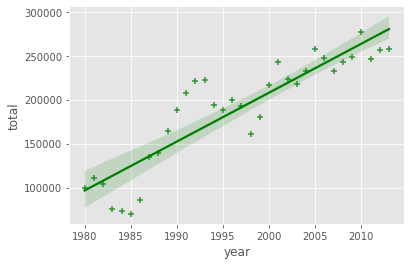

In [35]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

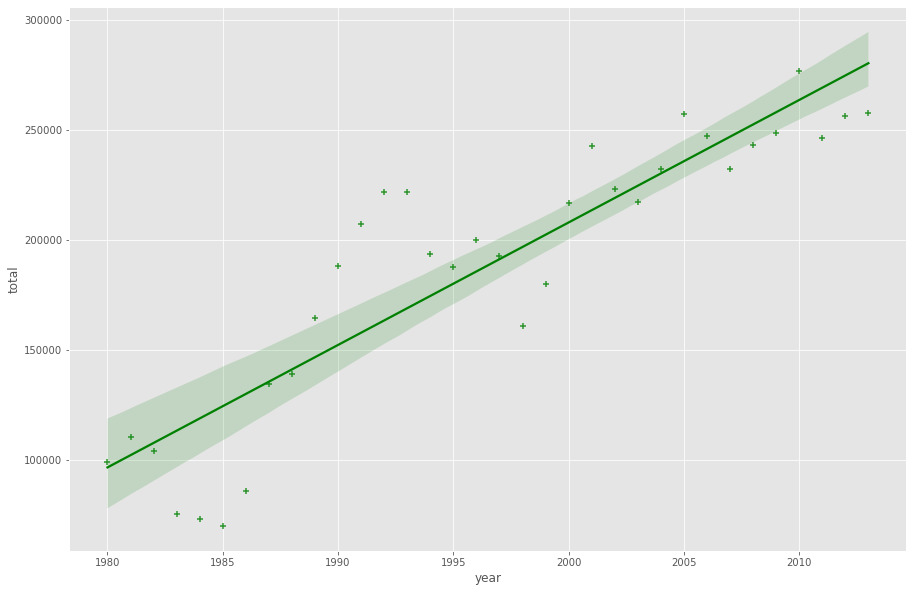

In [36]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

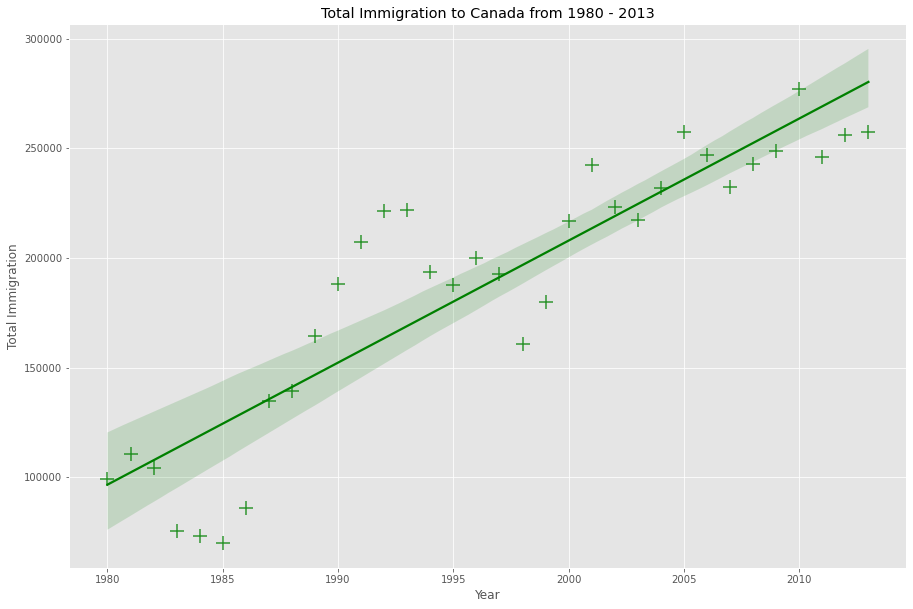

In [37]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

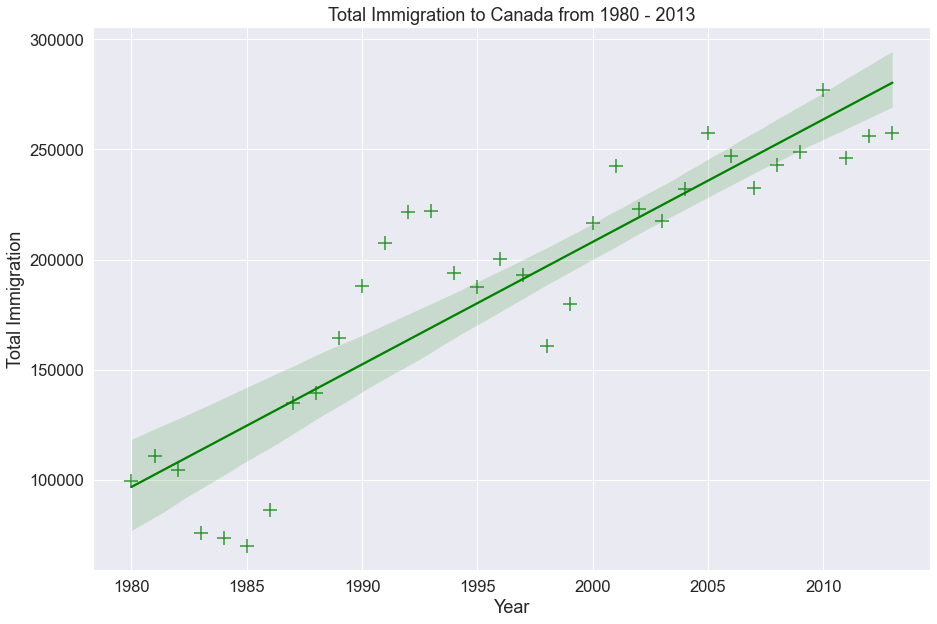

In [38]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

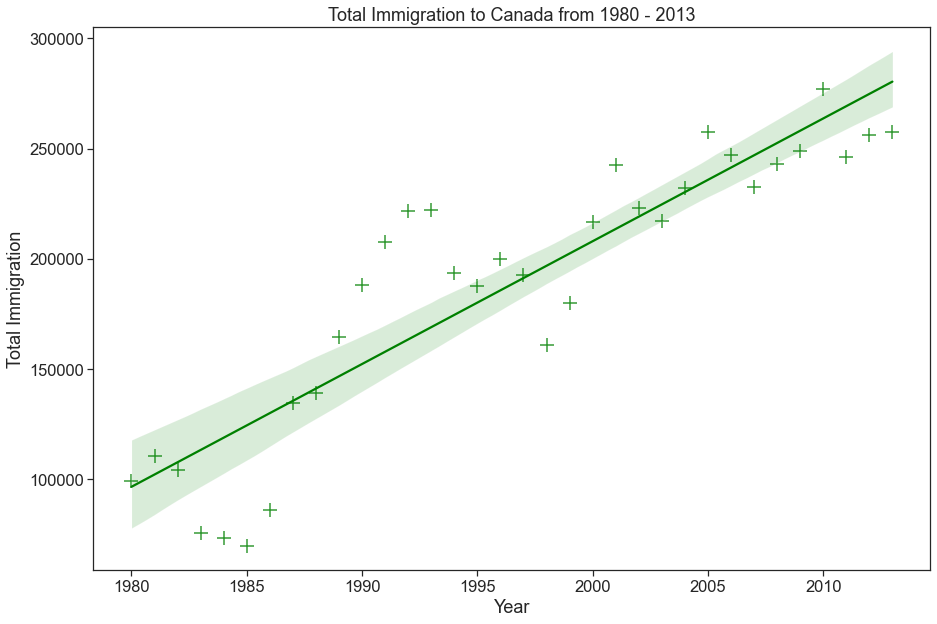

In [39]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

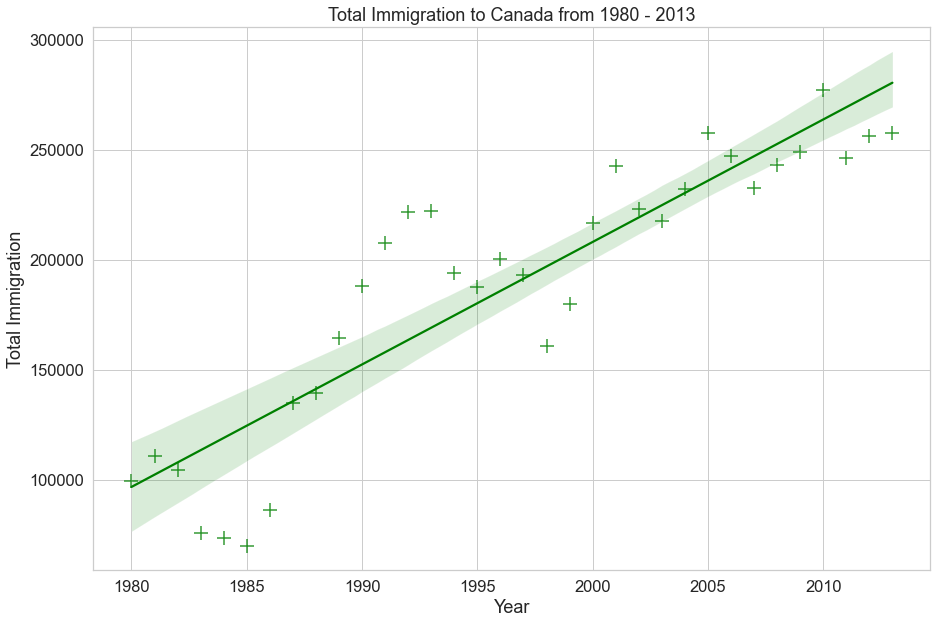

In [40]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

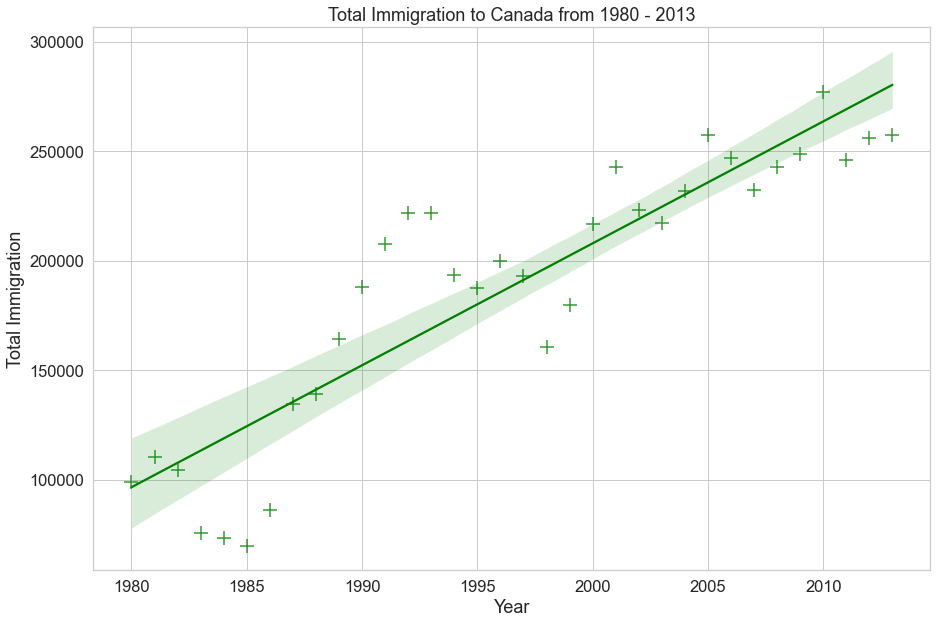

In [41]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

df_total=pd.DataFrame(df_countries.sum(axis=1))

df_total.reset_index(inplace=True)

df_total.columns=['year', 'total']

df_total['year']=df_total['year'].astype(int)

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

In [42]:
!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [43]:
world_map = folium.Map()

world_map

In [44]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)

world_map

In [45]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11)

world_map

In [46]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=15)

world_map

In [47]:
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, titles='Stamen Toner')

world_map

## Stamen Terrain Maps

In [48]:
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, titles='Stamen Toner')

world_map

## Map with Markers

In [52]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a a pandas dataframe!')

Dataset downloaded and read into a a pandas dataframe!


In [54]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [55]:
df_incidents.shape

(150500, 13)

In [56]:
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [57]:
df_incidents.shape

(100, 13)

In [58]:
latitude = 37.77
longitude = -122.42

In [59]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

sanfran_map

In [60]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    )
    )
    
sanfran_map.add_child(incidents)

In [61]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    )
    )

latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)
    

sanfran_map.add_child(incidents)

In [63]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

sanfran_map

In [66]:
from folium import plugins

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

sanfran_map

## Choropleth Maps

In [67]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [68]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                        sheet_name = 'Canada by Citizenship',
                        skiprows = range(20),
                        skipfooter = 2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [69]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [70]:
print(df_can.shape)

(195, 43)


In [71]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace = True)

df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'Regname':'Region'}, inplace = True)

df_can.columns = list(map(str, df_can.columns))


df_can['Total'] = df_can.sum (axis = 1)

years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 39)


C:\Users\User\AppData\Local\Temp\ipykernel_14712\2518675568.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum (axis = 1)


In [72]:
df_can.head()

,Country,Continent,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [80]:
world_geo = r'world_countries.json'

world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

world_map.choropleth(
        geo_data=world_geo,
        data=df_can,
        columns=['Country', 'Total'],
        key_on='feature.properties.name',
        fill_color='YlORd',
        fill_opacity=0.7,
        fill_opacity=0.2,
        legend_name='Immigration to Canada'
)

world_map

ValueError: Built-in templates for Mapbox and Cloudmade have been removed. You can still use these providers by passing a URL to the `tiles` argument. See the documentation of the `TileLayer` class.